# Analysis of MovieLens Data

**Created by Phillip Efthimion, Scott Payne, Gino Varghese and John Blevins**

*MSDS 7331 Data Mining - Section 403 - Lab 3*

# Business Understanding (10 points total) - John
• [10 points] Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

In this notebook publicly available data from MovieLens (movielens.org) will be analyzed. MovieLens is a non-commercial website that provides personalized movie recommendations.  The dataset was assembled by GroupLens (grouplens.org) and includes movie ratings data created by 671 users between January 09, 1995 and October 16, 2016.  The data includes 100,004 ratings and 1,296 tag applications across 9,125 movies.  The users were selected at random and each user rated at least 20 movies.  No demographic data was collected for the users.  The data is provided for public consumption at http://grouplens.org/datasets/ for the purposes of analysis and study.

The movie ratings data is signifcant as online movie providers are in constant competition with one another to best market their content to consumers.  Understanding their consumer market is vital to providing appropriate content choices for users to keep them interested and engaged with the provider's services.  Content providers are increasingly employing recomendation systems to help identify and target content.  Recommender systems can help providers better predict what titles may be of interest to individual consumers based on their past history and the history of others with similar interests.  

The MovieLens dataset provides sufficient data points to model a recommender system using either collaborative filtering, content-based filtering or a hybrid combination of the two.  In a collaborative filtering approach the past ratings of individual users as well as the ratings provided by other users can be considered for the purposes of making recommendations.  This approach however may suffer from the "Cold Start" problem where larger amounts of information are required to make accurate recommendations.  For this analysis we are utilizing a subset of the larger MovieLens data due to processing requirements.  A larger study may be conducted using the full compliment of data given the avaialability of additional resources. As an alternative to the collaborative filtering approach a content-based filtering model may be desireable where the genre and tag information are used to filter out recommendations based on discrete specific charateristics.  This approach may work well right away but could be limited to the subset of characteritic data available during the initial seeding and may not scale.

The effectiveness of the recommender algorithms will be measured by implementing a cross-validation split of testing and training data to then compare the Root Mean Square Errors (RMSE) and determine how well the models perform.  Precision and recall will also be assessed to determine the quality of the alogorthm.  In general the RMSE should be minimized while precision and recall should be consistently maximized.  For this analysis several model types will be fitted including item similarity and factorization models.  The tag and genre can also be side-loaded into an additional content-based model and used to emphasize these attributes in the recommendation process.  Ultimately the use of these models will allow us to predict with high confidence what movies users will like in an attempt to recommend or improve the stakeholder's existing algorithm.  The model is quite capable of being extend to certain scenarios such as building a recommended for a new user versus for a user who has consumed proivder content for a longer period of time.  This is one of many business use cases for the algorithm.   

# Data Understanding (20 points total) - Phillip
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?
• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

This data was compiled from movielens.org by F. Maxwell Harper and Joseph A. Kinston from the University of Minnesota. It contains 100,004 ratings by 671 unique users on 9,125 movies. These movies were all rated between January 1995 and October 2016. Each of the 671 users rated at least 20 movies. This data does not come from the full dataset, and is on a partial representation of the complete one. There is no duplicate data. There are some movies that may have the same title. However, they were released different years and have different unique movie ID numbers. Therefore, they are not  actually duplicates. For example, ‘Ghostbusters (1984)’ and ‘Ghostbusters (2016)’ with movie ID numbers 2716 and 160080 respectively. 

The data comes from multiple .cvs files that together make up a the information that we will be using for our analysis. The file ‘movies.csv’ contain 3 attributes. The movie ID, the title of the movie, and what genres the movie falls under. The movie ID is a unique identifier that is used as a primary key for identification between the datasets. The attribute ‘title’ contains both the title of a movie and the year that it was released. Again, since the attribute ‘title’ contains both the movie’s title and the year that movie was released, we do not have to worry about duplicates such as ‘Ghostbusters’. The attribute genre is a list of genres that a film can fall under. In the cases that a film may have elements of more then one genre, they all will be contained in this column separated by a ‘|’. The genres fall under a list of 18 along with a 19th being no genre listed. The file ‘ratings.csv’ contains 4 attributes. Those are the user ID, the movie ID, the rating that the specific user gave the film, and the timestamp. The user ID, like the movie ID acts as a primary key to uniquely identify each user. The attribute ‘Ratings’ is the rating from 1 to 5, with 5 being the highest, that the user rated the movie. These ratings do not have to be whole numbers. For example, a movie can be rated a 3.5. The timestamp is the amount of seconds since January 1st, 1970. It is supposed to be a timeline of when each of these ratings occurred. Day, month, and year of each rating is not provided, but from the timestamp it could be calculated. As it is, it functions as a time series. 

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

data_ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
data_movies = pd.read_csv('data/ml-latest-small/movies.csv')

data_ratings.head()
# data_movies.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
data_ratings.describe()
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


A box plot is created to get an initial idea about how the movies were rated in general. The box plot shows that the average rating of a movie was a 3.5 out of 5 stars. Also, fifty percent of the ratings given were between a 3 and 4. Almost all of the movies were rated between a 1.5 and 5 though there are some outliers that were movies  rated a 0.5 and 1 out of 5. No movies were rated a 0 out of 5 stars. It is unfair to think that these were mistakes, instead it could be that people did not enjoy the movie the were watching.

Axes(0.125,0.125;0.775x0.755)


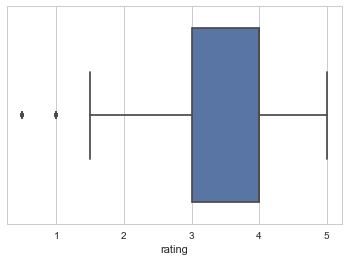

In [7]:
# Boxplot of Ratings using seaborn package

sns.set_style("whitegrid")

ax = sns.boxplot(x="rating", data = data_ratings)
print(ax)

Each user had to rate at least 20 movies to be included in this dataset. This was however only at a minimum and some users rated many more titles. Ten of the users rated over 1000 movie titles with one individual rating over 2000 different movies.  The user who rated over 2000 movies gave out an average rating of 3.3. 

In [8]:
data_ratings.userId.value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
452    1340
468    1291
380    1063
311    1019
30     1011
294     947
509     923
580     922
213     910
212     876
472     830
388     792
23      726
457     713
518     707
461     696
232     682
102     678
262     676
475     655
306     645
119     641
654     626
358     617
529     604
       ... 
356      21
579      21
319      20
14       20
448      20
583      20
76       20
310      20
1        20
498      20
438      20
638      20
651      20
325      20
399      20
289      20
209      20
296      20
445      20
337      20
249      20
540      20
604      20
668      20
657      20
221      20
444      20
484      20
35       20
485      20
Name: userId, Length: 671, dtype: int64

The plot below shows the distribution of ratings over time the most frequent rater provided for each film.

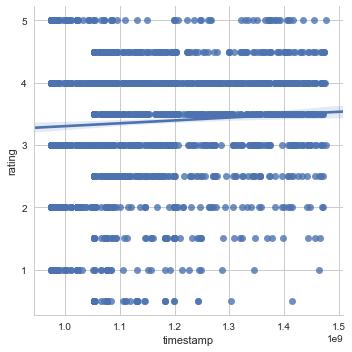

In [11]:
top_user = data_ratings[data_ratings.userId == 547]

top_ratings_box = sns.lmplot(x='timestamp', y='rating', data=top_user)

print(top_ratings_box)

In [12]:
top_user.describe()

,userId,movieId,rating,timestamp
count,2391.0,2391.000000,2391.000000,2.391000e+03
mean,547.0,25546.874529,3.366792,1.138885e+09
std,0.0,37267.186098,1.073516,1.415010e+08
min,547.0,1.000000,0.500000,9.747771e+08
25%,547.0,2479.500000,3.000000,1.022680e+09
50%,547.0,5339.000000,3.500000,1.093860e+09
75%,547.0,39397.500000,4.000000,1.224439e+09
max,547.0,163949.000000,5.000000,1.476588e+09


The movie that was rated the most frequently was Forest Gump with 341 votes. The top 5 frequently rated movies were Forest Gump, Pulp Fiction, Shawshank Redemption, Silence of the Lambs, and Star Wars: Episode IV - A New Hope. These movies were all realeased in the 1990s which was around the general adoption of the internet. It could be that these movies were rated more often and higher in the beginning when internet accessibility was taking hold.  These movies can be seen below by matching the 'movieId' and 'title' fields in the movie.csv file.  

In [13]:
# Which movies were rated the most
data_ratings.movieId.value_counts()



# 356    Forrest Gump
# 296    Pulp Fiction
# 318    Shawshank Redemption
# 593    Silence of the Lambs
# 260    Star Wars: Episode IV - A New Hope

356       341
296       324
318       311
593       304
260       291
480       274
2571      259
1         247
527       244
589       237
1196      234
110       228
1270      226
608       224
2858      220
1198      220
780       218
1210      217
588       215
457       213
2959      202
590       202
50        201
47        201
4993      200
858       200
150       200
364       200
380       198
32        196
         ... 
98160       1
6109        1
120805      1
131168      1
73860       1
60674       1
104595      1
133281      1
155820      1
26797       1
47287       1
8420        1
61250       1
3870        1
5917        1
1759        1
26323       1
32464       1
65216       1
65088       1
73276       1
7708        1
69118       1
110058      1
140763      1
48520       1
111913      1
1311        1
27922       1
2049        1
Name: movieId, Length: 9066, dtype: int64

In [14]:
print(data_movies.title[data_movies.movieId==356])
print(data_movies.title[data_movies.movieId==296])
print(data_movies.title[data_movies.movieId==318])
print(data_movies.title[data_movies.movieId==593])
print(data_movies.title[data_movies.movieId==260])

321    Forrest Gump (1994)
Name: title, dtype: object
266    Pulp Fiction (1994)
Name: title, dtype: object
284    Shawshank Redemption, The (1994)
Name: title, dtype: object
525    Silence of the Lambs, The (1991)
Name: title, dtype: object
232    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object


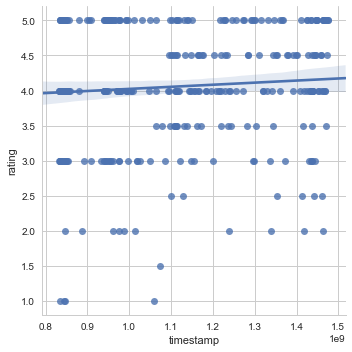

In [19]:
# Forest Gump Ratings over time

Gump_ratings = data_ratings[data_ratings.movieId == 356]

x356 = sns.lmplot(x='timestamp', y='rating', data=Gump_ratings)
print(x356)

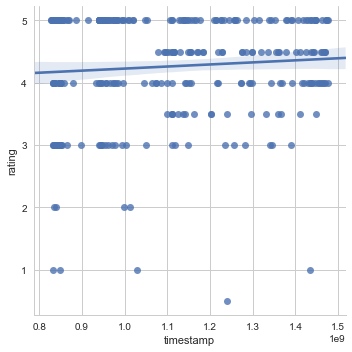

In [16]:
# Pulp Fiction ratings over time
Pulp_ratings = data_ratings[data_ratings.movieId == 296]

x296 = sns.lmplot(x='timestamp', y='rating', data=Pulp_ratings)
print(x296)

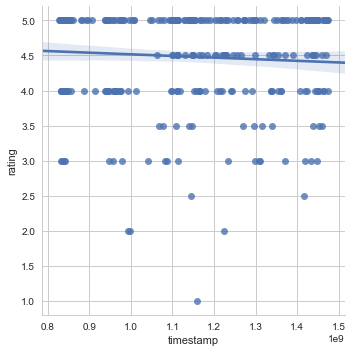

In [17]:
# Shawshank Redemption ratings over time
Shaw_ratings = data_ratings[data_ratings.movieId == 318]

x318 = sns.lmplot(x='timestamp', y='rating', data=Shaw_ratings)
print(x318)

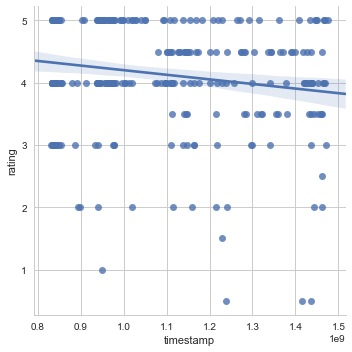

In [18]:
# Silence of the Lambs ratings over time
Lambs_ratings = data_ratings[data_ratings.movieId == 593]

x593 = sns.lmplot(x='timestamp', y='rating', data=Lambs_ratings)
print(x593)

The other movie in the top 5 was the first Star Wars movie released. It is different from many of the rest in that it was released a lot earlier. It is has a negative slope. This means that as time has gone on, it has received worse ratings then it did previously. It is possible that this could be due to the Star Wars prequel series, Ep. I, II, & III, which had on average, lower ratings. 

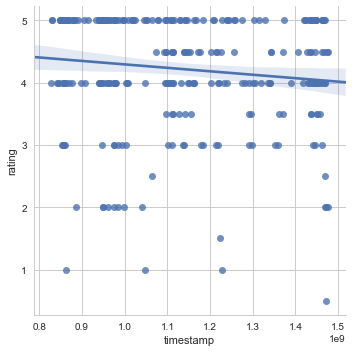

In [20]:
# Star Wars: Episode IV - A New Hope ratings over time
Shaw_ratings = data_ratings[data_ratings.movieId == 260]

x260 = sns.lmplot(x='timestamp', y='rating', data=Shaw_ratings)
print(x260)

# Modeling and Evaluation (50 points total) - Gino, Scott
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:
• [10 Points] Train and adjust parameters
• [10 Points] Evaluate and Compare
• [10 Points] Visualize Results
• [20 Points] Summarize the Ramifications - John/Phillip

## Collaborative Filtering 
• Train: Create user-item matrices or item-item matrices using collaborative filtering
(adjust parameters).
• Eval: Determine performance of the recommendations using different performance
measures (explain the ramifications of each measure).
• Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.
• Summarize: Describe your results. What findings are the most compelling and why?

### Train and adjust parameters (10 points) - Gino, Scott
### Evaluate and Compare (10 points) - Gino, Scott
### Visualize Results  (10 points) - Gino, Scott
### Summarize the Ramifications (20 points) - John/Phillip

### 1 Actual : Train and adjust parameters (10 points) - Gino, Scott


In [22]:
import graphlab as gl
from IPython.display import display
from IPython.display import Image

# sets the output of built in visualizations to the notebook instead of the browser based canvas utility
gl.canvas.set_target('ipynb') 



#Please ignore code block, the code was used for analysis
                                 
#data_rating.add_columns('')

#data_movies.add_column()

#model_ratings.user_id=data_movies.movieId 
                                                                  
#model_movies = gl.recommender.item_content_recommender.create(data_movies, user_id="movieId", item_id="title", target="genre")



In [23]:
# Reads the movie ratings data directly into an SFrame
data_ratings = gl.SFrame.read_csv("data/ml-latest-small/ratings.csv", column_type_hints={"rating":float})

# Removes timestamp column
data_ratings.remove_column('timestamp')


Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\ratings.csv

Parsing completed. Parsed 100 lines in 0.061163 secs.

Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\ratings.csv

Parsing completed. Parsed 100004 lines in 0.064672 secs.

userId,movieId,rating
1,31,2.5
1,1029,3.0
1,1061,3.0
1,1129,2.0
1,1172,4.0
1,1263,2.0
1,1287,2.0
1,1293,2.0
1,1339,3.5
1,1343,2.0


## Simple Recomender Model
GraphLab is able to create a recommender model from an SFrame and chooses the type of model that best fits the data. The only requirements are that the SFrame contain a column with Item ids and a column with User ids. An optional target value can be specified such as a rating, if no target is specified, then the model will be based on item-item similarity. 

In [24]:
# Because no model is specified, GraphLab will select the most approriate model
auto_selected_model = gl.recommender.create(data_ratings, user_id="userId", item_id="movieId", target="rating")

# results = model_ratings.recommend(users=None, k=5)
# results = model_ratings.recommend(users=None, k=3)
# model_ratings.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 100004 observations with 671 users and 9066 items.

Data prepared in: 0.076202s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 12500 / 100004 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.41725                                  |

| 5       | 0.0488281         | 1.4723                                   |

| 6       | 0.0244141         | 1.54903                                  |

| 7       | 0.012207          | 1.63684                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.41725                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 2.19497           | 1.05805               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 108.787ms    | 1.80822           | 1.07402               | 0.0976562   |

| 2       | 197.523ms    | 1.54717           | 0.998555              | 0.0580668   |

| 3       | 279.24ms     | 1.35415           | 0.926466              | 0.042841    |

| 4       | 370.482ms    | 1.15164           | 0.841875              | 0.0345267   |

| 5       | 454.205ms    | 1.00199           | 0.776703              | 0.029206    |

| 6       | 549.959ms    | 0.879333          | 0.71752               | 0.0254734   |

| 11      | 974.086ms    | 0.549729          | 0.534336              | 0.016168    |

| 25      | 2.08s        | 0.362009          | 0.413915              | 0.00873464  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.333638

Final training RMSE: 0.367027

### Simple code, powerful results 
With a simple line of code, GraphLab is able to examine the data and build a recommender model with optimized parameters. Because we are interested in how different recommender models perform, we will look at a few of the recommendation models in GraphLab and see how well we can optimize the parameters.


## Train and Compare 
Before we build our recommender models and optimize them, we need to create a cross-validation split of testing and training data so that we can determine how well our models are performing.

In [25]:
#80% train and 20% for testing 
train, test = gl.recommender.util.random_split_by_user(data_ratings,
                                                        user_id="userId", item_id="movieId",
                                                        max_num_users=150, item_test_proportion=0.2)

## Item-Item Similarity

In [26]:
# Create a recommender that uses item-item similarities based on users in common.
m1 = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="movieId", 
                                  #only_top_k=5,
                                  only_top_k=3,
                                  #similarity_type="sine")                    
                                  similarity_type="cosine")


#nearest_items = m1.get_similar_items()

#m1_nearest_items = gl.item_similarity_recommender.create(train, 
#                                  user_id="userId", 
#                                  item_id="movieId", 
#                                  target="rating",
#                                  #only_top_k=5,
#                                  only_top_k=3,
#                                  #similarity_type="sine")                    
#                                  similarity_type="cosine",
#                                  nearest_items = nearest_items)

rmse_results = m1.evaluate(test)

Recsys training: model = item_similarity

Warning: Column 'rating' ignored.

To use this column as the target, set target = "rating" and use a method that allows the use of a target.

Preparing data set.

Data has 95889 observations with 671 users and 8928 items.

Data prepared in: 0.062167s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.005ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 131.85ms                            | 0                | 0               |

| 796.617ms                           | 100              | 8928            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.809149s


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.326666666667 | 0.0240208228482 |
|   2    |      0.34      | 0.0429425775706 |
|   3    | 0.324444444444 | 0.0602435041405 |
|   4    | 0.306666666667 | 0.0761477756419 |
|   5    |     0.276      | 0.0827771802569 |
|   6    | 0.256666666667 | 0.0879907369007 |
|   7    | 0.246666666667 | 0.0989307752481 |
|   8    | 0.238333333333 |  0.108692044201 |
|   9    | 0.232592592593 |  0.121792562376 |
|   10   | 0.220666666667 |  0.124825173514 |
+--------+----------------+-----------------+
[10 rows x 3 columns]



## Ranking Factorization
The Factorization Recommender trains a model capable of predicting a score for each possible combination of users and items. The internal coefficients of the model are learned from known scores of users and items. Recommendations are then based on these scores.

In [27]:
# Model that learns latent factors for each user and item and uses them to make rating predictions
m2 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="movieId", 
                                  target="rating")

rmse_results = m2.evaluate(test)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 95889 observations with 671 users and 8928 items.

Data prepared in: 0.087232s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 11986 / 95889 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.43082                                  |

| 5       | 0.0488281         | 1.48993                                  |

| 6       | 0.0244141         | 1.57283                                  |

| 7       | 0.012207          | 1.66419                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.43082                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 2.19246           | 1.05746               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 76.7ms       | 1.8101            | 1.07157               | 0.0976562   |

| 2       | 170.951ms    | 1.56478           | 1.00182               | 0.0580668   |

| 3       | 296.285ms    | 1.36955           | 0.928153              | 0.042841    |

| 4       | 441.67ms     | 1.17192           | 0.847035              | 0.0345267   |

| 5       | 567.003ms    | 1.02425           | 0.781411              | 0.029206    |

| 6       | 671.781ms    | 0.902181          | 0.723546              | 0.0254734   |

| 10      | 961.552ms    | 0.605157          | 0.563252              | 0.017366    |

| 11      | 1.03s        | 0.562611          | 0.537431              | 0.016168    |

| 20      | 1.62s        | 0.395537          | 0.431563              | 0.0103259   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.331728

Final training RMSE: 0.36093


Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    | 0.173333333333 | 0.00877084093466 |
|   2    |      0.15      | 0.0176589249038  |
|   3    | 0.142222222222 | 0.0229244945677  |
|   4    | 0.136666666667 | 0.0278185890989  |
|   5    |     0.144      | 0.0381854010022  |
|   6    | 0.147777777778 | 0.0456851865536  |
|   7    | 0.141904761905 | 0.0543824469334  |
|   8    | 0.138333333333 | 0.0599848861081  |
|   9    | 0.133333333333 | 0.0630270315856  |
|   10   | 0.130666666667 | 0.0664883232596  |
+--------+----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.4735111898113946)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  296   |   2   | 0.394167127516 |
+--------+-------+----------------+
[1 rows x 3 columns]


Pe

## Comparison

In [28]:
model_comp = gl.recommender.util.compare_models(test, [m1,m2], model_names = ['Item-Item','Ranking Factorization'])

PROGRESS: Evaluate model Item-Item

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.326666666667 | 0.0240208228482 |
|   2    |      0.34      | 0.0429425775706 |
|   3    | 0.324444444444 | 0.0602435041405 |
|   4    | 0.306666666667 | 0.0761477756419 |
|   5    |     0.276      | 0.0827771802569 |
|   6    | 0.256666666667 | 0.0879907369007 |
|   7    | 0.246666666667 | 0.0989307752481 |
|   8    | 0.238333333333 |  0.108692044201 |
|   9    | 0.232592592593 |  0.121792562376 |
|   10   | 0.220666666667 |  0.124825173514 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model Ranking Factorization

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1   

In [29]:
params = {'user_id': 'userId', 
          'item_id': 'movieId', 
          'target': 'rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=10,
        environment=None)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-12-2017-14-05-4000000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-12-2017-14-05-4000000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-12-2017-14-05-4000000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-12-2017-14-05-4000000-bf5a5'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-12-2017-14-05-4000000-bf5a5' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-12-2017-14-05-4000000-bf5a5' scheduled.


In [30]:
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 10, 'Running': 0}

In [31]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
9,movieId,0.001,50,32,4,0.5
8,movieId,0.001,50,12,8,0.1
1,movieId,0.001,25,24,8,0.1
0,movieId,0.001,50,32,4,0.1
3,movieId,0.001,50,16,8,0.1
2,movieId,0.001,50,8,4,0.1
5,movieId,0.001,25,16,4,0.5
4,movieId,0.001,25,32,4,0.1
7,movieId,0.001,25,24,4,0.25
6,movieId,0.001,25,8,8,0.1


In [32]:
bst_prms = job.get_best_params()
bst_prms

{'item_id': 'movieId',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 32,
 'num_sampled_negative_examples': 4,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'rating',
 'user_id': 'userId'}

## Adding Side Data to the Model


In [33]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : userId
 Item ID                          : movieId
 Target                           : rating
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 95889
 Number of users                  : 671
 Number of items                  : 8928
 
 Training summary
 ----------------
 Training time                    : 5.1314
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 32
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regu

In [34]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.193333333333 | 0.0111662559717 |
|   2    |      0.17      | 0.0171827556103 |
|   3    | 0.168888888889 | 0.0266164419649 |
|   4    | 0.158333333333 | 0.0336291614322 |
|   5    |     0.152      | 0.0424461971748 |
|   6    | 0.141111111111 | 0.0458261926806 |
|   7    | 0.132380952381 | 0.0499423275232 |
|   8    |     0.1325     | 0.0560644387962 |
|   9    | 0.12962962963  | 0.0623485616401 |
|   10   | 0.130666666667 | 0.0716539035338 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.18      | 0.0108094

In [35]:
## need to talk about how the current rating in the model is harder to predict because rating goes from 1 to 5, 
## instead of 0 or 1. Ranking factoriztion is penalizing itself when building the model, instead of hit or a miss decision
## 

In [36]:
# Data for Model 2
data_movies = gl.SFrame.read_csv("data/ml-latest-small/movies.csv", 
                          column_type_hints={"movieId":int})
data_movies
#data_movies.remove_column('timestamp')
                                 


    
    #Extra credit , adding side features.
# adding options to include correction 
model_ratings = gl.recommender.ranking_factorization_recommender.create(data_ratings, user_id="userId", item_id="movieId", 
                                      item_data=data_movies, target="rating", ranking_regularization=0.1, unobserved_rating_value=1)
# leaving k as 5
results = model_ratings.recommend(users=None, k=5)
model_ratings.save("my_model")
                                 

    

Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\movies.csv

Parsing completed. Parsed 100 lines in 0.031081 secs.

Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\movies.csv

Parsing completed. Parsed 9125 lines in 0.022108 secs.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 100004 observations with 671 users and 9125 items.

Data prepared in: 0.081716s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| unobserved_rating_value        | Ranking Target Rating for Unobserved Interacti...| 1        |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 12500 / 100004 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 12.5              | Not Viable                               |

| 1       | 3.125             | Not Viable                               |

| 2       | 0.78125           | Not Viable                               |

| 3       | 0.195312          | 0.500216                                 |

| 4       | 0.0976562         | 0.451472                                 |

| 5       | 0.0488281         | 0.546944                                 |

| 6       | 0.0244141         | 0.896661                                 |

| 7       | 0.012207          | 1.20069                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.451472                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 502us        | 1.76675           | 1.05806               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 215.573ms    | 1.51423           | 0.990055              | 0.0976562   |

| 2       | 434.154ms    | 1.06773           | 0.768074              | 0.0976562   |

| 3       | 651.733ms    | 0.862308          | 0.654271              | 0.0976562   |

| 4       | 871.817ms    | 0.742853          | 0.589577              | 0.0976562   |

| 5       | 1.08s        | 0.659647          | 0.545676              | 0.0976562   |

| 6       | 1.30s        | 0.604192          | 0.518192              | 0.0976562   |

| 10      | 2.28s        | 0.475384          | 0.457225              | 0.0976562   |

| 11      | 2.53s        | 0.456062          | 0.448544              | 0.0976562   |

| 15      | 3.49s        | 0.401224          | 0.42272               | 0.0976562   |

| 20      | 4.68s        | 0.361119          | 0.403502              | 0.0976562   |

| 25      | 5.85s        | 0.336269          | 0.389665              | 0.0976562   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.313614

Final training RMSE: 0.34884

In [37]:
print(model_ratings.get)

<bound method RankingFactorizationRecommender.get of Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : userId
Item ID                          : movieId
Target                           : rating
Additional observation features  : 0
User side features               : []
Item side features               : ['movieId', 'title', 'genres']

Statistics
----------
Number of observations           : 100004
Number of users                  : 671
Number of items                  : 9125

Training summary
----------------
Training time                    : 7.1836

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 32
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 25

Regularization Settings
----------------------

In [38]:
#ignore code

#80% train and 20% for testing 
#train, test = gl.recommender.util.random_split_by_user(model_ratings,
#                                                    user_id="userId", item_id="movieId",
#                                                            max_num_users=150, item_test_proportion=0.2)

In [39]:
model_comp_rating = gl.recommender.util.compare_models(test,[m1,m2,model_ratings])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.326666666667 | 0.0240208228482 |
|   2    |      0.34      | 0.0429425775706 |
|   3    | 0.324444444444 | 0.0602435041405 |
|   4    | 0.306666666667 | 0.0761477756419 |
|   5    |     0.276      | 0.0827771802569 |
|   6    | 0.256666666667 | 0.0879907369007 |
|   7    | 0.246666666667 | 0.0989307752481 |
|   8    | 0.238333333333 |  0.108692044201 |
|   9    | 0.232592592593 |  0.121792562376 |
|   10   | 0.220666666667 |  0.124825173514 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    | 0.173333333333 | 0.0087

In [40]:
#Model:1 = item vs item similarity, if the user interacted with the item

#Model:2 = RankingFactorizationRecommender


# Deployment (10 points total) - John
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
• How would your deploy your model for interested parties?
• What other data should be collected?
How often would the model need to be updated, etc.?

# Exceptional Work (10 points total) - Scott
• You have free reign to provide additional analyses or combine analyses.

In [41]:
from IPython.display import display
from IPython.display import Image
import graphlab.aggregate as agg

data = gl.SFrame.read_csv("data/ml-latest-small/ratings.csv", 
                          column_type_hints={"movieId":int})

count_rating = data.groupby(key_columns='userId', operations={'rating': agg.COUNT()})

count_movie = data.groupby(key_columns='userId', operations={'movieId': agg.COUNT()})


#creating a count of ratings for each movie, to see how each movie has variablity in there ratings
#ex: movie 1 has lot more ratings
#count_movie_rating = data.groupby(key_columns='movieId', operations={'rating': agg.COUNT()})

data.show(view="Summary")

#data.show(view="Heat Map", x='movieId', y='count_movie_rating')

#ratings vs movieid, to identify the popular rating, how many users rated movies, into 5 rating categories.
data.show(view="Bar Chart", x='rating', y='movieId')


#data.show(view="Heat Map", x="userId", y="count_movie")

#Identify the number of movies that was watched by each user, 
data.show(view="Bar Chart", x="userId", y="count_movie")

# To see how many users have watched each movie, in logarthemic scale..
data.show(view="Heat Map", x="userId", y="count_rating")
#sa.count_rating = gl.SArray(data=count_rating, int)

#data.show(view="Heat Map", x='movieId', y='count_rating')

#data.show(view="Summary")


#data.show(view="Heat Map", x="movieId", y="rating")


#data.show(view="Heat Map", x="userId", y="rating")



#data_array = gl.SArray(data)
                            
#data.show(view="Bar Chart", x="userId", y="count_rating")

#count_rating.show(view="Numeric")
#show(view="numeric", data.)

#data.show(view="Bar Chart", x="userId", y="count_movie")

#data_array.show()


# talking of data gaps, after comparing the graphs "userid vc. count of rating" and "userid vs. count of movies", 
# we can say that, there is no data gaps present in the data set, for example, userid 547 watched 2391 movies 
# and also rated all the movies that was watched

Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\ratings.csv

Parsing completed. Parsed 100 lines in 0.046623 secs.

Finished parsing file C:\Users\Scott\Documents\data\ml-latest-small\ratings.csv

Parsing completed. Parsed 100004 lines in 0.059612 secs.

In [42]:
# Get the metadata ready
data_dir = 'data/ml-latest-small/'
urls = gl.SFrame.read_csv(path.join(data_dir, 'links.csv'))
items = items.join(urls, on='movieId')
users = gl.SFrame.read_csv(path.join(data_dir, 'ratings.csv'))

# Interactively evaluate and explore recommendations
view = model.views.overview(validation_set=validation_data,
                            user_data=users,
                            user_name_column='name',
                            item_data=items,
                            item_name_column='title',
                            item_url_column='url')
view.show()

NameError: name 'path' is not defined